### **Importing Libraries**


In [18]:
!pip install optuna

     |████████████████████████████████| 296kB 7.5MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 174kB 11.2MB/s 
     |████████████████████████████████| 112kB 20.1MB/s 
     |████████████████████████████████| 143kB 15.1MB/s 
     |████████████████████████████████| 51kB 5.5MB/s 
     |████████████████████████████████| 81kB 6.6MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-cp37-none-any.whl size=11107 sha256=2913f11a1061ba63b5020d9c26933f40a71c2a4256d52dd2b554bb29d3068abf
  Stored in directory: /root/.cache/pip/wheels/25/af/b8/3407109267803f4015e1ee2ff23be0c8c19ce4008665931ee1
Successfully built pyperclip


In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import kurtosis
from scipy.stats import skew
import optuna
import sklearn
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Read & Understand Data**

In [3]:
train = pd.read_csv("/content/drive/My Drive/HackersEarth/train.csv")
train.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074


In [4]:
test = pd.read_csv("/content/drive/My Drive/HackersEarth/test.csv")
test.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m)
0,WM_19817,2019-04-17 08:53:20,94.324266,17.641186,89.714193,51.146788,40.460560,39.594734,1073.202715,66.830037,16681.044117,24.004812,43.756693,445.976992,1664.222023,21.912243,BA,Medium,3.185837,0.403965,25.572431
1,WM_18723,2019-03-30 07:43:20,10.088870,13.978119,43.272846,46.516394,40.027788,41.176860,517.436430,37.284163,NaN,29.431813,42.728174,499.595287,1165.111992,-35.050093,A,Medium,3.016603,0.444755,24.371823
2,WM_34552,2019-08-10 11:33:20,347.152090,31.423035,41.076640,26.931602,43.109122,43.439556,1480.716492,70.010762,214812.836175,29.924235,43.256122,245.432231,1667.720491,27.195302,B2,Medium,2.611941,0.387368,27.654677
3,WM_28570,2019-06-26 03:53:20,24.471997,-99.000000,14.375078,66.513953,13.741253,15.577472,887.979475,41.445258,NaN,23.886434,13.501595,NaN,1329.744740,15.245757,BBB,Low,2.866805,0.450478,24.189426
4,WM_36934,2019-08-27 16:43:20,96.997026,33.281836,41.405192,1.843112,121.572907,43.934587,2053.916354,68.007787,16833.546517,35.906889,-99.000000,442.425744,691.408996,34.257024,A,Low,3.549672,0.368355,4.885440


In [5]:
print("Train data contains % 2d rows and % 2d columns" %(train.shape[0],train.shape[1]), "\n")
print("Test data contains {} rows and {} columns" .format(test.shape[0],test.shape[1]))

Train data contains  28200 rows and  22 columns 

Test data contains 12086 rows and 21 columns


In [6]:
for columns in train.columns:
  if columns not in test.columns:
    print("Column not present in the Test Data is: ", columns)

Column not present in the Test Data is:  windmill_generated_power(kW/h)


### **EDA for Train Data**

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [8]:
train.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b341fa4d0>,
      dtype=object)

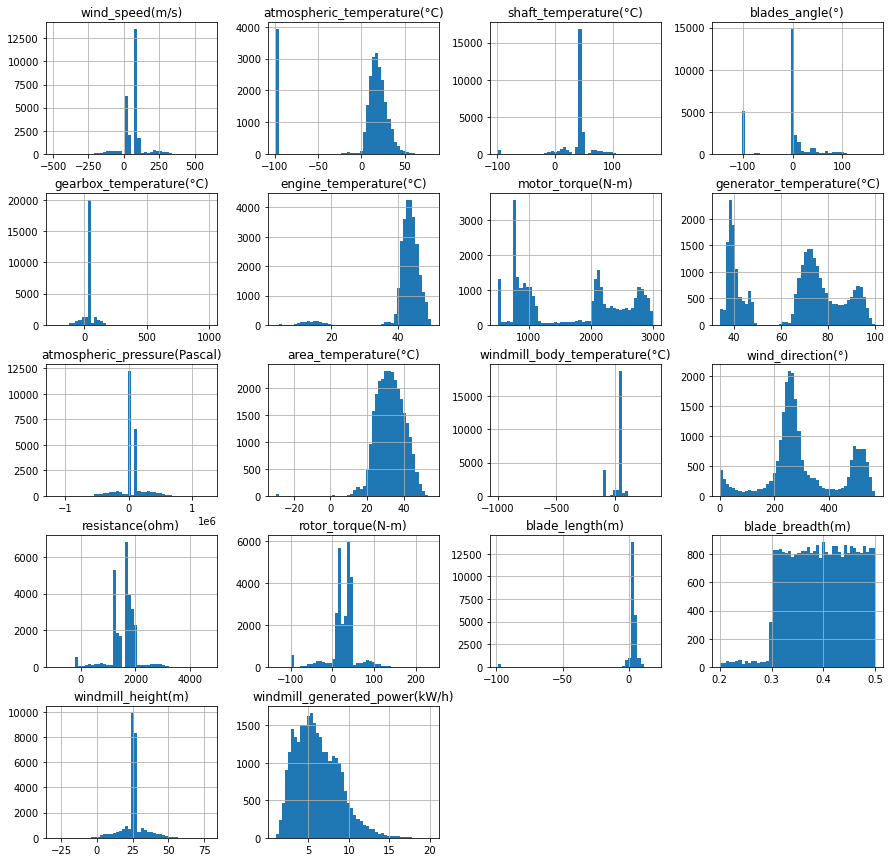

In [9]:
train.hist(bins=50, figsize=(15, 15))

In [10]:
train.skew()

wind_speed(m/s)                  -0.060477
atmospheric_temperature(°C)      -1.674895
shaft_temperature(°C)            -2.525168
blades_angle(°)                  -0.652122
gearbox_temperature(°C)           0.886846
engine_temperature(°C)           -3.944776
motor_torque(N-m)                 0.034258
generator_temperature(°C)        -0.190809
atmospheric_pressure(Pascal)      0.056671
area_temperature(°C)             -0.625424
windmill_body_temperature(°C)    -2.236832
wind_direction(°)                 0.171942
resistance(ohm)                  -0.697809
rotor_torque(N-m)                -1.030947
blade_length(m)                  -8.608358
blade_breadth(m)                 -0.193401
windmill_height(m)               -0.113280
windmill_generated_power(kW/h)    0.688935
dtype: float64

In [11]:
#print(data_train.isnull().any())
print(train.isnull().sum())

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64


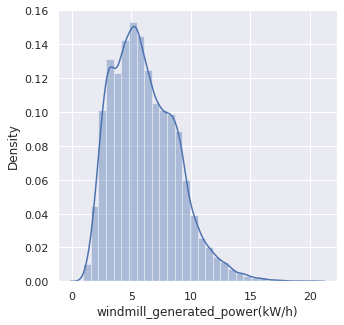

In [18]:
sns.set(rc={'figure.figsize':(5,5)})
sns.distplot(train['windmill_generated_power(kW/h)'], bins=30)
plt.show()

### **EDA for Test Data**

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12086 entries, 0 to 12085
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tracking_id                    12086 non-null  object 
 1   datetime                       12086 non-null  object 
 2   wind_speed(m/s)                11960 non-null  float64
 3   atmospheric_temperature(°C)    10659 non-null  float64
 4   shaft_temperature(°C)          12085 non-null  float64
 5   blades_angle(°)                11980 non-null  float64
 6   gearbox_temperature(°C)        12085 non-null  float64
 7   engine_temperature(°C)         12081 non-null  float64
 8   motor_torque(N-m)              12075 non-null  float64
 9   generator_temperature(°C)      12081 non-null  float64
 10  atmospheric_pressure(Pascal)   10935 non-null  float64
 11  area_temperature(°C)           12085 non-null  float64
 12  windmill_body_temperature(°C)  11160 non-null 

In [14]:
test.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m)
count,11960.000000,10659.000000,12085.000000,11980.000000,12085.000000,12081.000000,12075.000000,12081.000000,1.093500e+04,12085.000000,11160.000000,9926.000000,12086.000000,11805.000000,9972.000000,12086.000000,11831.000000
mean,69.381862,0.687445,39.936571,-9.218509,40.318639,42.604738,1717.343991,65.237894,5.428332e+04,32.796168,20.906469,308.376140,1581.289398,26.566581,2.201328,0.397527,25.963743
std,76.119487,44.051104,27.114499,47.574365,42.481822,6.215124,829.809203,19.868135,1.872562e+05,7.671919,53.291337,133.923293,483.125121,32.103827,11.513251,0.061661,7.716063
min,-525.530600,-99.000000,-99.000000,-99.000000,-185.860883,-5.000000,500.000000,30.000000,-1.207259e+06,-30.000000,-99.000000,0.000000,-1654.449587,-182.169613,-99.000000,0.200009,-21.215639
25%,21.809823,8.118199,41.635406,-1.191777,40.460379,41.925716,874.238660,41.283334,1.679650e+04,27.406656,40.366937,238.782318,1272.310773,13.760163,2.520990,0.346909,24.452970
50%,93.338083,16.177184,43.707769,-0.497108,43.219752,43.553196,2032.285162,70.797759,1.820142e+04,32.658467,42.788389,272.047526,1680.225602,33.090562,3.434327,0.399637,25.950314
75%,95.251808,23.855116,45.756032,6.232264,45.840152,45.228475,2480.423058,79.432294,1.183212e+05,38.302814,44.506596,408.668722,1837.302026,41.976934,4.342784,0.450488,27.490102
max,525.434211,80.442232,183.299983,170.047823,563.000000,49.858945,2997.013769,99.571599,1.127571e+06,53.927698,191.979747,570.857751,4106.196001,213.260076,17.847936,0.499985,77.604969


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b330e39d0>,
      dtype=object)

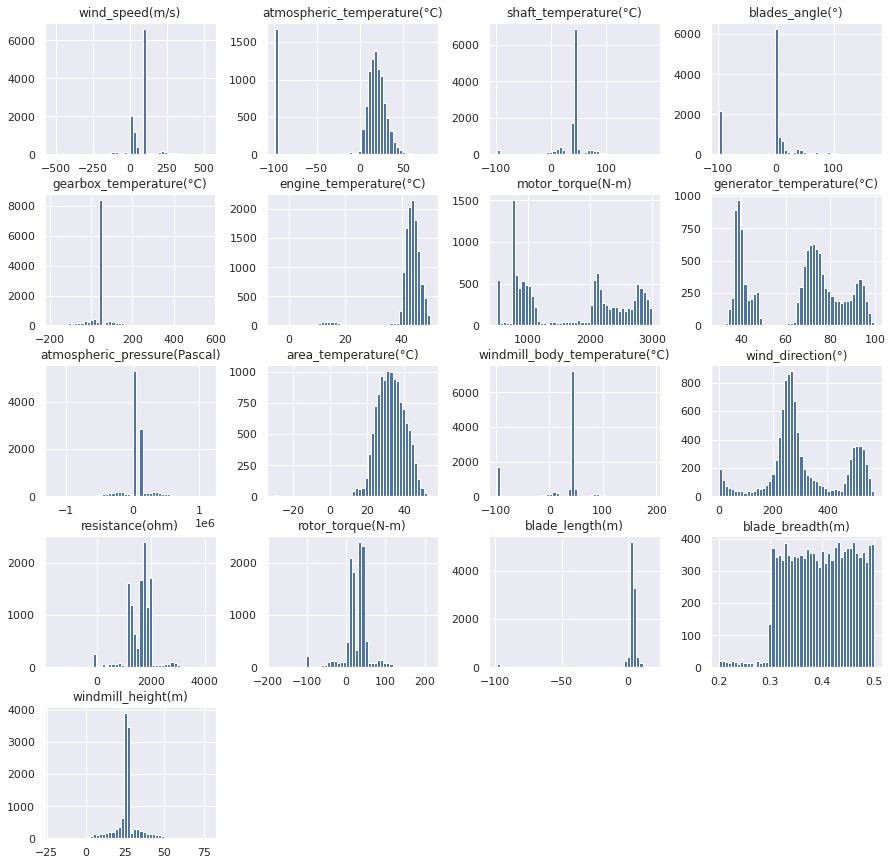

In [15]:
test.hist(bins=50, figsize=(15, 15))

In [16]:
test.skew()

wind_speed(m/s)                 -0.186603
atmospheric_temperature(°C)     -1.691742
shaft_temperature(°C)           -2.586815
blades_angle(°)                 -0.676513
gearbox_temperature(°C)         -0.183242
engine_temperature(°C)          -3.874864
motor_torque(N-m)                0.031105
generator_temperature(°C)       -0.193475
atmospheric_pressure(Pascal)     0.068360
area_temperature(°C)            -0.539537
windmill_body_temperature(°C)   -1.570474
wind_direction(°)                0.169702
resistance(ohm)                 -0.752013
rotor_torque(N-m)               -0.907148
blade_length(m)                 -8.436438
blade_breadth(m)                -0.219657
windmill_height(m)               0.022495
dtype: float64

In [17]:
#print(data_train.isnull().any())
print(test.isnull().sum())

tracking_id                         0
datetime                            0
wind_speed(m/s)                   126
atmospheric_temperature(°C)      1427
shaft_temperature(°C)               1
blades_angle(°)                   106
gearbox_temperature(°C)             1
engine_temperature(°C)              5
motor_torque(N-m)                  11
generator_temperature(°C)           5
atmospheric_pressure(Pascal)     1151
area_temperature(°C)                1
windmill_body_temperature(°C)     926
wind_direction(°)                2160
resistance(ohm)                     0
rotor_torque(N-m)                 281
turbine_status                    797
cloud_level                       125
blade_length(m)                  2114
blade_breadth(m)                    0
windmill_height(m)                255
dtype: int64


### **Merging Two Data for Data Pre-Processing**

In [77]:
trainNew = train.copy()
#trainNew.drop(['windmill_generated_power(kW/h)'], axis=1,inplace=True)
testNew = test.copy()
testNew['windmill_generated_power(kW/h)'] = 0
df = pd.concat([trainNew.assign(ind="train"), test.assign(ind="test")])
df

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),ind
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,103402.961872,26.897875,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521,train
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,17030.904078,39.801469,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275,train
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,16125.927107,36.116065,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342,train
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,18689.732336,46.020045,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089,train
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,114468.169007,34.572941,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,-15.039400,18.517204,43.545409,-1.094038,44.550547,44.486619,2424.370244,75.850209,17239.345506,28.424722,42.128526,509.795489,1798.141681,-14.365696,NaN,Medium,3.286975,0.407771,20.888674,NaN,test
12082,WM_1630,2018-11-12 17:33:20,97.594116,-99.000000,44.747916,1.750553,43.308176,42.848779,2085.627252,73.091866,17131.448669,50.615296,47.353528,345.705839,1680.245230,-7.062661,AB,Low,NaN,0.367823,24.793606,NaN,test
12083,WM_24703,2019-05-27 11:53:20,16.186805,8.109976,43.252012,-0.691090,214.904165,41.177782,788.687177,39.514258,118707.643665,20.983939,41.768478,205.569627,2343.165194,12.331790,BA,Low,3.728375,0.459887,5.653451,NaN,test
12084,WM_22893,2019-05-13 21:53:20,93.254033,-99.000000,43.841789,-1.171974,41.976913,42.039796,2079.855634,71.482324,17155.269313,29.114305,82.750271,260.578999,1732.883672,NaN,A,Medium,2.247676,0.394680,24.591364,NaN,test


### **Identifying the Numerical and Categorical Columns**

In [78]:
categoricalData = [column for column in df.columns if df[column].dtype == object ]
print("Categorical Columns in data are: ", categoricalData)

numericalData  = [column for column in df.columns if df[column].dtype != object]
print("Numerical Columns in data are: ", numericalData)

Categorical Columns in data are:  ['tracking_id', 'datetime', 'turbine_status', 'cloud_level', 'ind']
Numerical Columns in data are:  ['wind_speed(m/s)', 'atmospheric_temperature(°C)', 'shaft_temperature(°C)', 'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)', 'motor_torque(N-m)', 'generator_temperature(°C)', 'atmospheric_pressure(Pascal)', 'area_temperature(°C)', 'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)', 'rotor_torque(N-m)', 'blade_length(m)', 'blade_breadth(m)', 'windmill_height(m)', 'windmill_generated_power(kW/h)']


### **Cleaning Data**

#### **Removing negative values from Data**

In [79]:
print(df[(df['wind_speed(m/s)'] < 0 )].shape)
print(df[(df['blade_length(m)'] < 0 )].shape)
print(df[(df['blade_breadth(m)'] < 0 )].shape)
print(df[(df['windmill_height(m)'] < 0 )].shape)

(3008, 23)
(2043, 23)
(0, 23)
(201, 23)


In [80]:
df['wind_speed(m/s)'] = np.absolute(df['wind_speed(m/s)'])
df['blade_length(m)'] = np.absolute(df['blade_length(m)'])
df['windmill_height(m)'] = np.absolute(df['blade_length(m)'])

In [81]:
for column in numericalData:
  Q1,Q3 = np.nanpercentile(df[column] , [25,75])
  IQR = Q3 - Q1
  cutOff = 1.5 * IQR
  lower_range = Q1 - cutOff
  upper_range = Q3 + cutOff
  print("Column is {} Q1 Value is {} Q3 value is {} lower bound is {} and upper bound is {}".format(column,Q1,Q3,lower_range,upper_range))

Column is wind_speed(m/s) Q1 Value is 34.27470394593506 Q3 value is 95.59746673614234 lower bound is -57.709440239375866 and upper bound is 187.58161092145326
Column is atmospheric_temperature(°C) Q1 Value is 8.008307072303031 Q3 value is 23.75040792626871 lower bound is -15.604844208645487 and upper bound is 47.36355920721723
Column is shaft_temperature(°C) Q1 Value is 41.63393721822672 Q3 value is 45.697643362615295 lower bound is 35.538378001643856 and upper bound is 51.79320257919816
Column is blades_angle(°) Q1 Value is -1.195674501194573 Q3 value is 5.720102421508656 lower bound is -11.569339885249416 and upper bound is 16.093767805563502
Column is gearbox_temperature(°C) Q1 Value is 40.529119983841476 Q3 value is 45.865149259842376 lower bound is 32.525076069840125 and upper bound is 53.869193173843726
Column is engine_temperature(°C) Q1 Value is 41.915526322117636 Q3 value is 45.190412553085615 lower bound is 37.00319697566567 and upper bound is 50.102741899537584
Column is mot

#### **Handling outliers**

In [82]:
df.loc[df['wind_speed(m/s)'] > 186, ['wind_speed(m/s)']] = (34+96)/2

In [83]:
print(df[(df['blade_length(m)'] > 7)].shape)
df.loc[df['blade_length(m)'] > 7, ['blade_length(m)']] = (2+3)/2

(2033, 23)


In [84]:
print(df[(df['area_temperature(°C)'] < 11)].shape)
df.loc[df['area_temperature(°C)'] < 11 , ['area_temperature(°C)']] = (27+38)/2

(101, 23)


In [85]:
print(df[(df['engine_temperature(°C)'] < 38)].shape)
df.loc[df['engine_temperature(°C)'] < 11 , ['engine_temperature(°C)']] = (42+45)/2

(1875, 23)


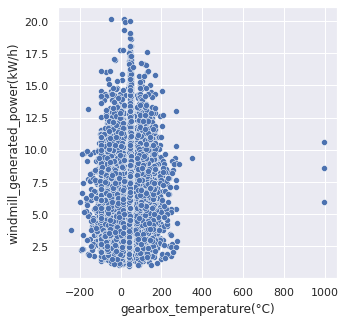

In [86]:
sns.scatterplot(x='gearbox_temperature(°C)',y='windmill_generated_power(kW/h)',data=df)

In [87]:
print(df[(df['gearbox_temperature(°C)'] < -200)].shape)
print(df[(df['gearbox_temperature(°C)'] > 300)].shape)
df.loc[(df['gearbox_temperature(°C)'] < -200) | (df['gearbox_temperature(°C)'] > 300) , ['gearbox_temperature(°C)']] = df['gearbox_temperature(°C)'].mean()

(2, 23)
(5, 23)


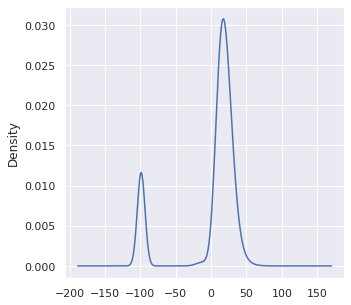

In [88]:
df['atmospheric_temperature(°C)'].plot(kind='kde')

In [89]:
 print(df[(df['atmospheric_temperature(°C)'] < -50)].shape)
 #df['atmospheric_temperature(°C)'].mean()

(5615, 23)


### **Handling Null Values in Numerical data**

In [90]:
for column in numericalData:
  if column == 'windmill_generated_power(kW/h)':
    continue
  else:
    df[column] = df[column].fillna(df[column].mean())
  
df.isnull().sum()

tracking_id                           0
datetime                              0
wind_speed(m/s)                       0
atmospheric_temperature(°C)           0
shaft_temperature(°C)                 0
blades_angle(°)                       0
gearbox_temperature(°C)               0
engine_temperature(°C)                0
motor_torque(N-m)                     0
generator_temperature(°C)             0
atmospheric_pressure(Pascal)          0
area_temperature(°C)                  0
windmill_body_temperature(°C)         0
wind_direction(°)                     0
resistance(ohm)                       0
rotor_torque(N-m)                     0
turbine_status                     2556
cloud_level                         401
blade_length(m)                       0
blade_breadth(m)                      0
windmill_height(m)                    0
windmill_generated_power(kW/h)    12293
ind                                   0
dtype: int64

### **Handling Null Values in Categorical Data**

##### **Finding unique value for the categorical columns**

In [91]:
for col in df[categoricalData]:
  if not (col == 'tracking_id') and not (col == 'datetime'):
    print("Unique values for: ", col)
    print(df[col].unique())
    print("\n")

Unique values for:  turbine_status
['BA' 'A2' 'ABC' 'AAA' 'BD' 'AC' 'BB' 'BCB' 'B' 'AB' nan 'B2' 'BBB' 'A'
 'D']


Unique values for:  cloud_level
['Medium' nan 'Low' 'Extremely Low']


Unique values for:  ind
['train' 'test']




In [92]:
print('Total null values in Cloud Level Feature: {}'.format(df['cloud_level'].isnull().sum()))
print('Total null values in Turnbine Status Feature: {}'.format(df['turbine_status'].isnull().sum()))

Total null values in Cloud Level Feature: 401
Total null values in Turnbine Status Feature: 2556


##### **Replace Null values with MODE**

In [93]:
for column in categoricalData:
  if column == 'tracking_id' or column == 'datetime' or column == 'ind':
    continue;
  else:
    modeValue = df[column].mode()[0]
    print('Mode for {} is: {}'.format(column, modeValue), "\n")
    df[column] = df[column].fillna(modeValue)
    

df.isnull().sum()

Mode for turbine_status is: BB 

Mode for cloud_level is: Low 



tracking_id                           0
datetime                              0
wind_speed(m/s)                       0
atmospheric_temperature(°C)           0
shaft_temperature(°C)                 0
blades_angle(°)                       0
gearbox_temperature(°C)               0
engine_temperature(°C)                0
motor_torque(N-m)                     0
generator_temperature(°C)             0
atmospheric_pressure(Pascal)          0
area_temperature(°C)                  0
windmill_body_temperature(°C)         0
wind_direction(°)                     0
resistance(ohm)                       0
rotor_torque(N-m)                     0
turbine_status                        0
cloud_level                           0
blade_length(m)                       0
blade_breadth(m)                      0
windmill_height(m)                    0
windmill_generated_power(kW/h)    12293
ind                                   0
dtype: int64

### **Removing Duplicated values, as it won't give any insight**

In [94]:
df.duplicated().any()

False

In [95]:
print("Shape before deleting duplicates: ", df.shape, "\n")
df.drop_duplicates(keep=False, inplace= True)
print("Shape after deleting duplicates: ", df.shape)

Shape before deleting duplicates:  (40286, 23) 

Shape after deleting duplicates:  (40286, 23)


### **Converting Categorical Data to Numerical Data**

In [96]:
df = pd.get_dummies(df, columns=['turbine_status','cloud_level'])
df.head(1)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),ind,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.0,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.66556,103402.961872,26.897875,20.831949,239.836388,2730.310605,42.084666,2.217542,0.314065,2.217542,6.766521,train,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


### **Converting date to datetime format splitting its value according to Date, Day and year**



In [97]:
df['datetimeNew'] = pd.to_datetime(df['datetime'])
df.head(1)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),ind,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium,datetimeNew
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.0,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.66556,103402.961872,26.897875,20.831949,239.836388,2730.310605,42.084666,2.217542,0.314065,2.217542,6.766521,train,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2019-08-04 14:33:20


In [98]:
df['month'] = df['datetimeNew'].dt.month
df['day'] = df['datetimeNew'].dt.day
df['year'] = df['datetimeNew'].dt.year
df['hour'] = df['datetimeNew'].dt.hour
df['minute'] = df['datetimeNew'].dt.minute
df.drop(['datetimeNew'], axis=1, inplace= True)
df.head(1)

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),ind,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium,month,day,year,hour,minute
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.0,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.66556,103402.961872,26.897875,20.831949,239.836388,2730.310605,42.084666,2.217542,0.314065,2.217542,6.766521,train,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8,4,2019,14,33


### **Handling Outliers: Z-score**

In [ ]:
# for column in numericalData:
#  plt.figure()
#  df.boxplot([column])

In [ ]:
# for column in numericalData:
#   print("Column name: ", column)
#   z_score_Count = df[(np.abs(stats.zscore(df[column])) < 3)].shape
#   print(z_score_Count, "\n")

In [ ]:
# for column in numericalData:
#   if column == 'windmill_generated_power(kW/h)':
#     continue
#   else:
#     df['engine_temperature(°C)'] = df[(np.abs(stats.zscore(df[column])) < 3)]
  
# df.shape

In [ ]:
# df['engine_temperature(°C)'].drop((np.abs(stats.zscore(df['engine_temperature(°C)'])) < 3),axis=0, inplace= True)

### **Handling Skewness of the Data**




```
wind_speed(m/s)                  1.709789
atmospheric_temperature(°C)     -1.881654
shaft_temperature(°C)           -2.543519
engine_temperature(°C)          -3.924257
windmill_body_temperature(°C)   -2.187910
rotor_torque(N-m)               -1.017602
blade_length(m)                 -9.475171
turbine_status_A                 3.399410
turbine_status_A2                3.502554
turbine_status_AAA               3.453663
turbine_status_AB                3.485547
turbine_status_ABC               3.500113
turbine_status_AC                3.521397
turbine_status_B                 3.507447
turbine_status_B2                3.393331
turbine_status_BA                3.492813
turbine_status_BB                2.156873
turbine_status_BBB               3.516459
turbine_status_BCB               3.428623
turbine_status_BD                3.519749
turbine_status_D                 3.456822
cloud_level_Extremely Low        9.467264
year                            -1.579932
```



In [99]:
skewedColumns = ['wind_speed(m/s)','atmospheric_temperature(°C)', 'shaft_temperature(°C)', 'engine_temperature(°C)', 'windmill_body_temperature(°C)', 'rotor_torque(N-m)', 'blade_length(m)']
power = PowerTransformer(method='yeo-johnson', standardize=True) 
for column in skewedColumns:
  df[column] = power.fit_transform(df[column].values.reshape(-1,1))

df.head()

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h),ind,turbine_status_A,turbine_status_A2,turbine_status_AAA,turbine_status_AB,turbine_status_ABC,turbine_status_AC,turbine_status_B,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium,month,day,year,hour,minute
0,WM_33725,2019-08-04 14:33:20,0.653771,-1.663338,-0.069568,-0.903423,82.410573,-0.412742,2563.124522,76.665560,103402.961872,26.897875,-0.546160,239.836388,2730.310605,0.495735,-1.041485,0.314065,2.217542,6.766521,train,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8,4,2019,14,33
1,WM_698,2018-11-05 10:13:20,-0.172760,1.024740,-2.678454,-99.000000,44.104919,1.041606,2372.384119,78.129803,17030.904078,39.801469,-0.546160,337.944723,1780.207200,3.345801,0.855433,0.448494,4.210346,5.966275,train,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11,5,2018,10,13
2,WM_39146,2019-09-14 14:03:20,0.672223,-0.714702,-0.062679,12.652763,42.322098,-0.296665,1657.169646,67.654469,16125.927107,36.116065,0.446288,227.850294,1666.049900,-1.725629,-0.574694,0.302321,2.719475,2.874342,train,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,9,14,2019,14,3
3,WM_6757,2018-12-25 15:33:20,-0.172760,-1.663338,0.125906,15.115323,44.759643,1.541334,2888.134079,95.389974,18689.732336,46.020045,0.437100,492.081520,1964.502895,0.522346,1.493185,0.367140,4.857385,14.851089,train,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,12,25,2018,15,33
4,WM_21521,2019-05-04 03:13:20,-1.666594,-0.714702,-0.056137,1.715696,-17.616459,-0.093963,781.695419,37.423065,114468.169007,34.572941,-1.804251,259.274601,1177.516152,-0.593302,-0.015962,0.453374,4.768878,3.519074,train,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,4,2019,3,13


### **Spliting Test and Train Data**

In [100]:
data_test, data_train = df[df["ind"].eq("test")], df[df["ind"].eq("train")]
data_train.drop(['ind'], axis=1, inplace=True)
data_test.drop(['ind', 'windmill_generated_power(kW/h)'], axis=1, inplace=True)
print("Test Data shape: ", data_test.shape, "\n")
print('Train Data shape: ', data_train.shape)

Test Data shape:  (12086, 41) 

Train Data shape:  (28200, 42)


In [104]:
data_train = data_train.dropna(how='any',axis=0)
data_train.shape

(27993, 42)

### **Separating features and labels**

In [108]:
newDataFrame = data_train.drop(['tracking_id','datetime','motor_torque(N-m)','windmill_generated_power(kW/h)', 'windmill_body_temperature(°C)'], axis=1)

In [109]:
features = newDataFrame
label = data_train['windmill_generated_power(kW/h)']

In [138]:
newDataFrameTest = data_test.drop(['tracking_id','datetime','motor_torque(N-m)', 'windmill_body_temperature(°C)'], axis=1)
featuresTest = newDataFrameTest

### **Feature Engineering**

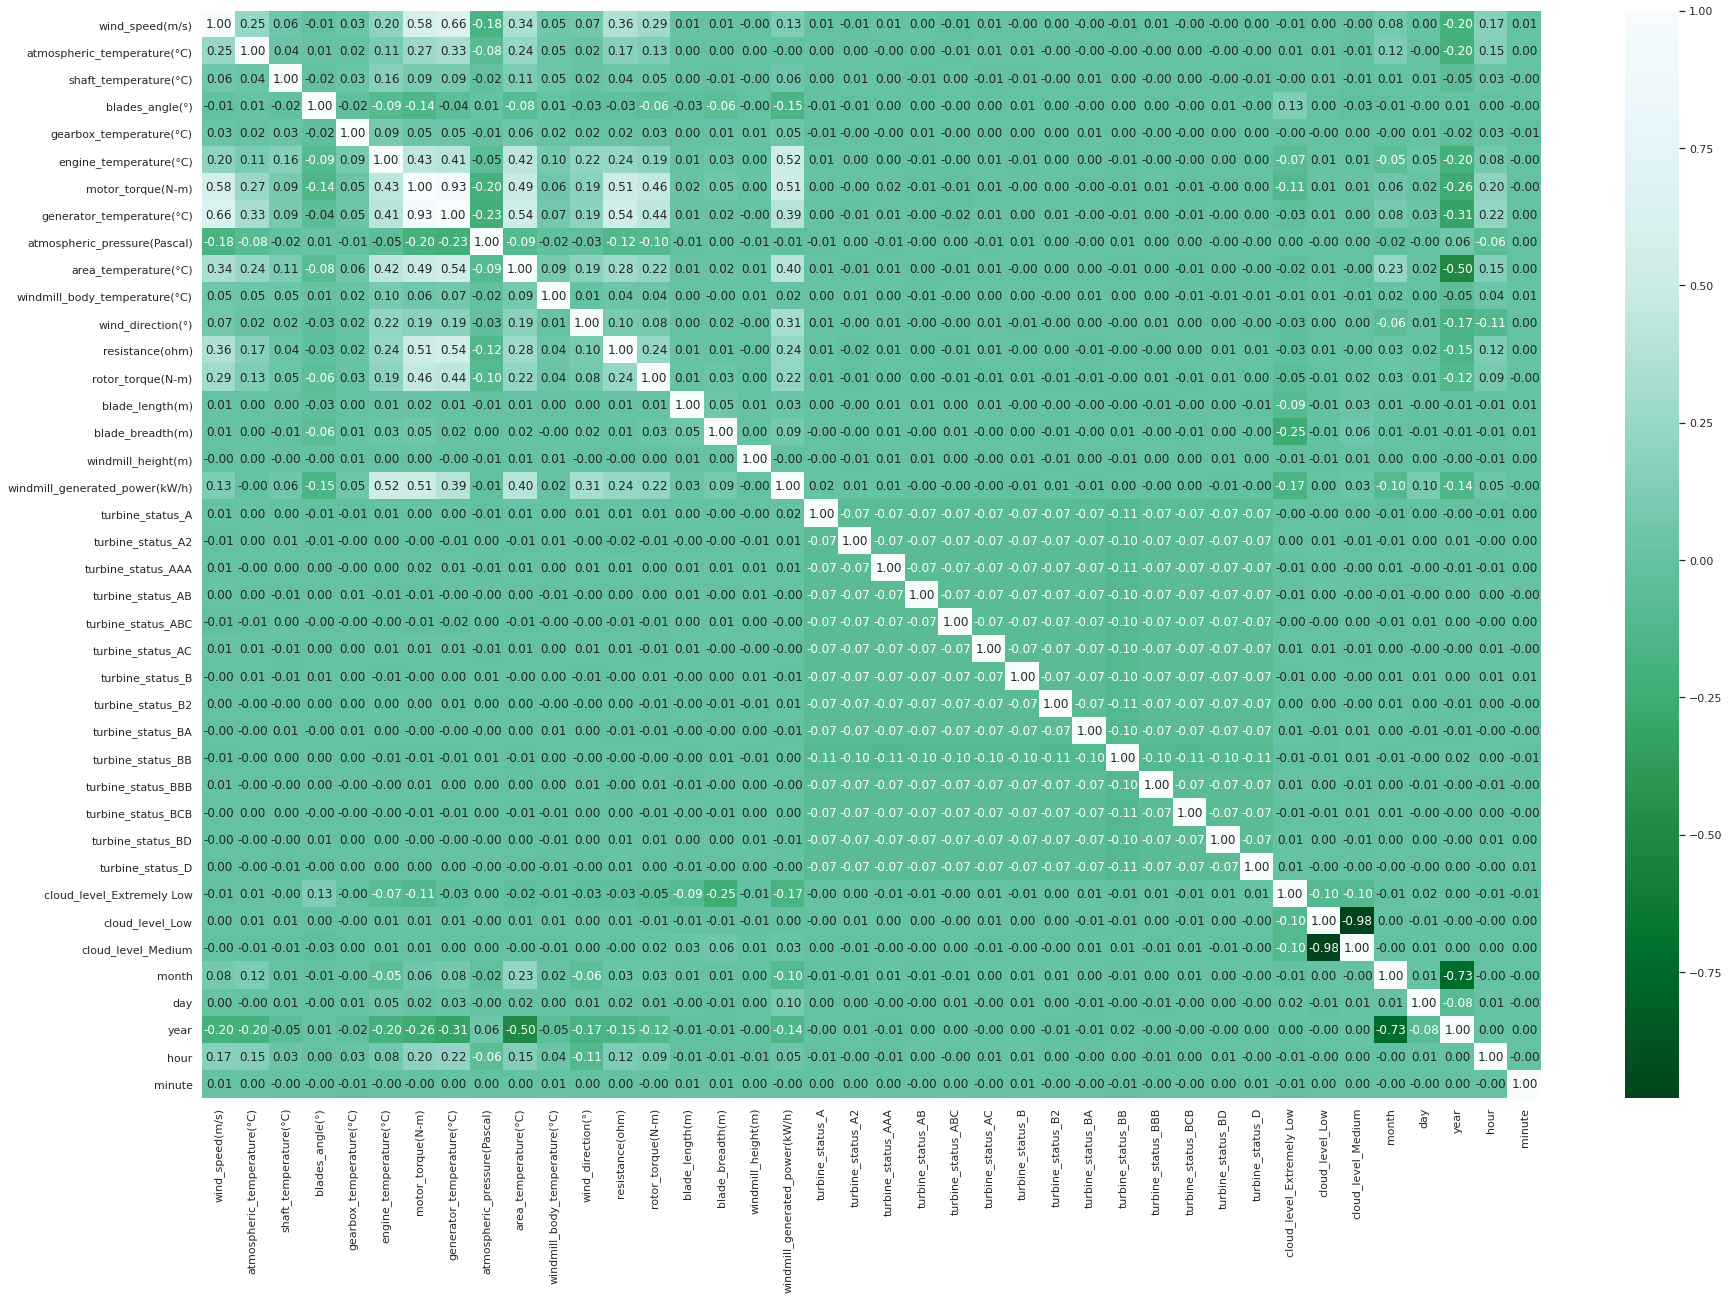

In [113]:
 plt.figure(figsize=(30,20))
sns.heatmap(data_train.corr(),annot=True,cmap='BuGn_r',fmt='.2f')

In [114]:
vif = pd.DataFrame()
def calc_vif(X):
 # Calculating VIF
 vif["variables"] = X.columns
 vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 return(vif)
X =  newDataFrame
calc_vif(X)
vif_high = vif.sort_values(by = 'VIF', ascending=False)
vif_high

,variables,VIF
18,turbine_status_AB,inf
26,turbine_status_BCB,inf
19,turbine_status_ABC,inf
22,turbine_status_B2,inf
17,turbine_status_AAA,inf
16,turbine_status_A2,inf
15,turbine_status_A,inf
23,turbine_status_BA,inf
24,turbine_status_BB,inf
25,turbine_status_BBB,inf


In [115]:
# 1. Initialize the model algorithm
from sklearn.linear_model import LinearRegression

modelLR = LinearRegression()

# 2. Apply RFE to model (ALL FEATURES AND LABEL)
from sklearn.feature_selection import RFE
selectFeaturesFromRFE = RFE(estimator=modelLR,step=1)

# Fit the data with RFE
selectFeaturesFromRFE.fit(features,label)

# 3. Get Features with High Ranking (1,2,3,4,...) (Get features that has Rank 1. Sometimes Rank 2 is considered)
print(selectFeaturesFromRFE.ranking_)


[ 1  1  1 13 19  1  4 20  1 14 17  1  5  1 15  1  1 11 12 10  3  6  1  2
  1  9  1  1  7  1  1  1  1  8  1 16 18]


 'atmospheric_temperature(°C)','shaft_temperature(°C)', 'engine_temperature(°C)', 'area_temperature(°C)', 'windmill_body_temperature(°C)', 'rotor_torque(N-m)',
'blade_breadth(m)', 'turbine_status_A', 'turbine_status_A2', 'turbine_status_AAA', 'turbine_status_B2', 'turbine_status_BB', 'turbine_status_BCB', 'cloud_level_Extremely Low','cloud_level_Low', 'cloud_level_Medium', 'month',  'year'

In [116]:
# Initialize the model algorithm
from sklearn.linear_model import LinearRegression
modelLR = LinearRegression()
# 2. Apply SBM to model (ALL FEATURES AND LABEL)
from sklearn.feature_selection import SelectFromModel
selectFeaturesFromSFM = SelectFromModel(modelLR)
# Fit the data with SFM
selectFeaturesFromSFM.fit(features,label)
# 3. Get Features with True value
print(selectFeaturesFromSFM.get_support())


[ True  True False False False  True False False False False False False
 False  True False False False False False False False False False False
 False False False False False  True  True  True False False False False
 False]


'atmospheric_temperature(°C)','engine_temperature(°C)', 'blade_breadth(m)', 'cloud_level_Extremely Low', 'cloud_level_Low', 'cloud_level_Medium', 'year'

In [118]:
selectedFeatures = newDataFrame.loc[:,['atmospheric_temperature(°C)','engine_temperature(°C)', 'generator_temperature(°C)', 'blade_breadth(m)','rotor_torque(N-m)','shaft_temperature(°C)', 'cloud_level_Extremely Low','cloud_level_Low', 'cloud_level_Medium', 'area_temperature(°C)','wind_direction(°)', 'resistance(ohm)', 'minute', 'day', 'hour']]

### **APPLYING STANDARD SCALER**

In [139]:
#initialize scalar
standardScaler = StandardScaler()
selectedFeatures = standardScaler.fit_transform(selectedFeatures)
features = standardScaler.fit_transform(features)
featuresTest = standardScaler.fit_transform(featuresTest)

### **Applying PCA**

In [ ]:
# from sklearn import decomposition
# pca = decomposition.PCA(n_components=4)
# pca.fit(features)
# features = pca.transform(features)
# featuresTest =  pca.transform(featuresTest)

### **Building the Model**

#### **Train Test Split with Feature Engineered Data**

In [55]:
# x_train,x_test,y_train,y_test = train_test_split(selectedFeatures,label,train_size=0.8,random_state=15)
# print(x_train.shape,y_train.shape)
# print(x_test.shape,y_test.shape)

(22394, 16) (22394,)
(5599, 16) (5599,)


#### **Train Test Split with whole data**

##### **Finding optimum no random state**

In [ ]:
# for i in range(1,50):
#   X_train,X_test,y_train,y_test = train_test_split(features, label, test_size=0.2, random_state = i)
#   model1 = RandomForestRegressor()
#   model1.fit(X_train,y_train)
  
#   train_score = model1.score(X_train,y_train)
#   test_score = model1.score(X_test,y_test)
#   #if (test_score > 0.95):
#   print("Test: {} , Train: {} , RS : {}".format(test_score,train_score,i))


In [120]:
x_train,x_test,y_train,y_test = train_test_split(features,label,train_size=0.8,random_state=15)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(22394, 37) (22394,)
(5599, 37) (5599,)


In [124]:
def objective(trial): 
  n_estimators = trial.suggest_int('n_estimators', 2, 20)
  max_depth = int(trial.suggest_loguniform('max_depth', 1, 32))

  model1 = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
  return sklearn.model_selection.cross_val_score(model1, features, label, n_jobs=-1, cv=3).mean()

In [125]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-05-25 06:17:18,835] A new study created in memory with name: no-name-5de8cf72-5c23-45fe-95b5-9bce170b9ce7
[I 2021-05-25 06:17:20,862] Trial 0 finished with value: 0.42012367881931406 and parameters: {'n_estimators': 8, 'max_depth': 1.8739868698533093}. Best is trial 0 with value: 0.42012367881931406.
[I 2021-05-25 06:17:26,377] Trial 1 finished with value: 0.9406971477581313 and parameters: {'n_estimators': 7, 'max_depth': 18.647127884377564}. Best is trial 1 with value: 0.9406971477581313.
[I 2021-05-25 06:17:27,002] Trial 2 finished with value: 0.42037747519731744 and parameters: {'n_estimators': 7, 'max_depth': 1.4181451406766477}. Best is trial 1 with value: 0.9406971477581313.
[I 2021-05-25 06:17:33,616] Trial 3 finished with value: 0.9340415660327768 and parameters: {'n_estimators': 14, 'max_depth': 9.507764016994466}. Best is trial 1 with value: 0.9406971477581313.
[I 2021-05-25 06:17:34,784] Trial 4 finished with value: 0.42077685973199347 and parameters: {'n_estimators

In [126]:
trial = study.best_trial
print('Accuracy: {}'.format(trial.value))

Accuracy: 0.9492500747110224


In [127]:
print("Best hyperparameters: {}".format(trial.params))

Best hyperparameters: {'n_estimators': 19, 'max_depth': 21.183668300467755}


In [128]:
optuna.visualization.plot_optimization_history(study)

#### **Building model**

In [130]:
def ModelTypes():
  modelType = []
  modelType.append(('LinearRegression'   , make_pipeline(StandardScaler(), LinearRegression())))
  modelType.append(('Lasso'  ,make_pipeline(StandardScaler(), Lasso())))
  modelType.append(('Ridge', make_pipeline(StandardScaler(), Ridge(alpha=1.0))))
  modelType.append(('ElasticNet'  , make_pipeline(StandardScaler(), ElasticNet())))
  modelType.append(('KNN'   , make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=2))))
  modelType.append(('ExtraTreesRegressor', make_pipeline(StandardScaler(), ExtraTreesRegressor(n_jobs=-1, min_samples_leaf=1, max_depth=20, min_samples_split=3, n_estimators=1000))))
  modelType.append(('DecisionTree'  , make_pipeline(StandardScaler(), DecisionTreeRegressor())))
  modelType.append(('RandomForest'   , make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators= 19, max_depth= 21.183668300467755, n_jobs=-1))))
  modelType.append(('XGBRF'  , make_pipeline(StandardScaler(), XGBRFRegressor(n_jobs=-1, silent=True))))
  modelType.append(('GradientBoostingRegressor', make_pipeline(StandardScaler(), GradientBoostingRegressor(criterion='mse',random_state=2,max_depth=5,n_estimators=500,min_samples_split=2,min_samples_leaf=2))))
  modelType.append(('XGBRegressor', make_pipeline(StandardScaler(), XGBRegressor(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)))) 
  
  return modelType

In [131]:
def ModelBuilding(X_train, y_train, models):
  num_folds = 10
  scoring = 'neg_mean_squared_error'
  SEED = 15
  modelScoreDict = {}
  for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=SEED)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
    modelScoreDict[name] = cv_results
    scores = "{}: {} ({})" .format(name, cv_results.mean(), cv_results.std())
    print(scores)

  return modelScoreDict

In [132]:
models = ModelTypes()
modelScoreDict = ModelBuilding(x_train, y_train, models)

LinearRegression: 0.4333906630741307 (0.014894403450913946)
Lasso: 0.12927031447078055 (0.003027175609316092)
Ridge: 0.43337866492676086 (0.014895005711183993)
ElasticNet: 0.2416608093979645 (0.0057294997190671885)
KNN: 0.3477389776798444 (0.020665299255663537)
ExtraTreesRegressor: 0.944345887272154 (0.0056656883192872445)
DecisionTree: 0.8968051359397432 (0.013749937897242262)
RandomForest: 0.9479943101798997 (0.009517495040726569)
XGBRF: 0.6879389156956318 (0.01176125680432958)
GradientBoostingRegressor: 0.9575389964309817 (0.005455326211585919)
[07:32:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:35] WARNING: /workspace/src/objective/regression_obj.cu:15

In [134]:
gbr = GradientBoostingRegressor(criterion='mse',random_state=2,max_depth=5,n_estimators=500,min_samples_split=2,min_samples_leaf=2)
# rf = RandomForestRegressor(n_jobs=-1)
et = ExtraTreesRegressor(n_jobs=-1, min_samples_leaf=1, max_depth=20, min_samples_split=3, n_estimators=1000)
xgb = XGBRegressor(n_estimators=500,max_depth=5,booster='gbtree',n_jobs=-1,learning_rate=0.1,reg_lambda=0.01,reg_alpha=0.3)

In [135]:
%%time

modelFinal = VotingRegressor([('gbr', gbr),('xgb',xgb),('et', et)],n_jobs=-1)
modelFinal.fit(features, label)

#y_test_pre = modelFinal.predict(featuresTest)
y_train_pre = modelFinal.predict(features)
r2_train = r2_score(label, y_train_pre)
rmse_train  = np.sqrt(mean_squared_error(label, y_train_pre))
print("-----Training Data Evalution-----")
print("R2 Value: ", r2_train)
print("RMSE: ", rmse_train)

-----Training Data Evalution-----
R2 Value:  0.9920613682918419
RMSE:  0.24034207205593527
CPU times: user 15.1 s, sys: 10.5 s, total: 25.7 s
Wall time: 4min 48s


### **Predicting the Value from Test Data**

In [140]:
predictedValue = modelFinal.predict(featuresTest)

In [141]:
print("The length of the predicted vlue is: {}".format(len(predictedValue)), "\n")
print(predictedValue)

The length of the predicted vlue is: 12086 

[ 2.44797516  2.90429274  3.26160248 ...  5.24811424  5.35849325
 10.40200394]


In [142]:
finalDataFrame = test.loc[:,['tracking_id','datetime']]
finalDataFrame['windmill_generated_power(kW/h)'] = predictedValue 

In [143]:
finalDataFrame

,tracking_id,datetime,windmill_generated_power(kW/h)
0,WM_19817,2019-04-17 08:53:20,2.447975
1,WM_18723,2019-03-30 07:43:20,2.904293
2,WM_34552,2019-08-10 11:33:20,3.261602
3,WM_28570,2019-06-26 03:53:20,7.292018
4,WM_36934,2019-08-27 16:43:20,3.567884
...,...,...,...
12081,WM_13376,2019-02-12 11:33:20,6.268449
12082,WM_1630,2018-11-12 17:33:20,3.276343
12083,WM_24703,2019-05-27 11:53:20,5.248114
12084,WM_22893,2019-05-13 21:53:20,5.358493


In [144]:
finalDataFrame.to_csv('/content/drive/My Drive/HackersEarth/predictionDataNew2.csv', header=True, index=False)